In [154]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches
import seaborn as sns
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
from matplotlib.backends.backend_pdf import PdfPages 

from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler
from sklearn.metrics import mean_squared_error, median_absolute_error, mean_absolute_error
from sklearn.metrics import r2_score, explained_variance_score

from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, ExtraTreesRegressor

from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.linear_model import Ridge, RidgeCV, BayesianRidge
from sklearn.linear_model import HuberRegressor, TheilSenRegressor, RANSACRegressor

from sklearn.neural_network import MLPRegressor

from numpy import loadtxt
from sklearn.ensemble import GradientBoostingRegressor as gBR
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import os
import gmplot
import gmaps
import time, datetime
%matplotlib inline

In [155]:
def date_from_line(line):
    """returns DDMMYYYY from line in data file"""
    if int(line['Day'])<10:
        day='0'+str(line['Day'])
    else:
        day=str(line['Day'])
    if int(line[1])<10:
        month='0'+str(line['Month'])
    else:
        month=str(line['Month'])
    return day+month+str(line['Year'])

In [156]:
print(os.getcwd())
df=pd.read_csv('new_model_data_00010001.csv')
df.head(10)

C:\Users\Cara\Documents\COMPSCI\1A_PRACTICUM


,Year,Month,Day,Hours,Minute,Second,WeekDay,Timestamp,JourneyPatternID,VehicleJourneyID,StopID,Temperature (C),Visibility (km),Wind Speed (km/h),Cumulative Time Taken,StopSeq
0,2012,11,6,8,59,2,1,1352192342,10001,5461,226,7,10,29.6,0,0
1,2012,11,6,9,4,41,1,1352192681,10001,5461,231,8,10,31.5,339,5
2,2012,11,6,9,6,22,1,1352192782,10001,5461,1641,8,10,31.5,440,6
3,2012,11,6,9,7,58,1,1352192878,10001,5461,1642,8,10,31.5,536,7
4,2012,11,6,9,15,42,1,1352193342,10001,5461,47,8,10,31.5,1000,15
5,2012,11,6,9,18,1,1,1352193481,10001,5461,49,7,10,27.8,1139,17
6,2012,11,6,9,19,42,1,1352193582,10001,5461,51,7,10,27.8,1240,19
7,2012,11,6,9,22,21,1,1352193741,10001,5461,265,7,10,27.8,1399,21
8,2012,11,6,9,24,43,1,1352193883,10001,5461,271,7,10,27.8,1541,22
9,2012,11,6,9,29,2,1,1352194142,10001,5461,340,7,10,27.8,1800,23


In [157]:
#order sequence sourced from files available on dublinked site
stops_ordered = [226, 228, 229, 227, 230, 231, 1641, 1642, 213, 214, 4432, 119, 44, 45, 46, 47, 48, 49, 50, 51, 52, 265, 271, 340, 350, 351, 352, 353, 354, 355, 356, 357, 390, 372, 373, 374, 375, 2804, 376, 377, 378, 380]
stops_order = {}
for i in range(len(stops_ordered)):
    stops_order[stops_ordered[i]] = (i)

In [158]:
#for key in stops_order:
    #print(key, stops_order[key])

In [159]:
#sunday 11th, nov
dfSun = df.loc[df['WeekDay']==6]
dfSunN = dfSun.loc[dfSun['Month']==11]
dfSunOneWeekN = dfSunN.loc[(dfSunN['Day'] == 11)] 
dfSunOneWeekN['StopSeq'] = 0


C:\Users\Cara\Anaconda3\envs\summer_project_windows_1_0\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [160]:
#add related stop sequencce value to new column
for item, row in df.iterrows():
    for key, value in stops_order.items():
        if row['StopID'] == key:
            df.set_value(item, 'StopSeq', value)
df['StopSeq'] = df['StopSeq'].astype(int)

In [161]:
df.head(3)

,Year,Month,Day,Hours,Minute,Second,WeekDay,Timestamp,JourneyPatternID,VehicleJourneyID,StopID,Temperature (C),Visibility (km),Wind Speed (km/h),Cumulative Time Taken,StopSeq
0,2012,11,6,8,59,2,1,1352192342,10001,5461,226,7,10,29.6,0,0
1,2012,11,6,9,4,41,1,1352192681,10001,5461,231,8,10,31.5,339,5
2,2012,11,6,9,6,22,1,1352192782,10001,5461,1641,8,10,31.5,440,6


In [162]:
df.dtypes

Year                      int64
Month                     int64
Day                       int64
Hours                     int64
Minute                    int64
Second                    int64
WeekDay                   int64
Timestamp                 int64
JourneyPatternID          int64
VehicleJourneyID          int64
StopID                    int64
Temperature (C)           int64
Visibility (km)          object
Wind Speed (km/h)        object
Cumulative Time Taken     int64
StopSeq                   int32
dtype: object

In [163]:
df['StopSeq'] = df['StopSeq'].astype(int)

In [164]:
#remove lines with Calm in windspeed
#remove lines with '-' in visibility

#proceed with feature use

# count = 0
# for item, row in df.iterrows():
#     if row['Wind Speed (km/h)']=="Calm":
#         print(row['Wind Speed (km/h)'], count, type(row['Wind Speed (km/h)']))
#         count+=1
#         del row
#     else:
#         continue

In [165]:
for col_name in df:
    print(col_name, "\n", df[col_name].unique(), "\n", "number of unique values:", len(df[col_name].unique()), "\n", df[col_name].value_counts(), "\n")

Year 
 [2012 2013] 
 number of unique values: 2 
 2013    16091
2012    13436
Name: Year, dtype: int64 

Month 
 [11  1] 
 number of unique values: 2 
 1     16091
11    13436
Name: Month, dtype: int64 

Day 
 [ 6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30
  1  2  3  4  5 31] 
 number of unique values: 31 
 8     1416
22    1290
7     1281
14    1268
26    1252
21    1213
15    1200
19    1149
16    1147
9     1126
29    1107
23    1097
17    1093
10    1073
12    1041
28    1035
6     1020
13    1007
27     974
24     919
20     916
11     857
18     829
25     797
3      710
4      705
30     572
2      563
5      491
1      278
31     101
Name: Day, dtype: int64 

Hours 
 [ 8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23  7] 
 number of unique values: 17 
 12    2856
11    2768
13    2764
14    2716
16    2384
15    2335
10    2330
17    2137
9     1813
18    1725
20    1435
19    1351
21    1241
22    1029
23     563
8       79
7        1
Name: Hours, dt

In [166]:
dfMon = df.loc[df['WeekDay']==0]
dfMonN = dfMon.loc[dfMon['Month']==11]
dfMonN.head(5)
# dfMonNVJ = dfMonN.loc[dfMonN['VehicleJourneyID'==5461]]
# dfMonNVJ.head(5)

,Year,Month,Day,Hours,Minute,Second,WeekDay,Timestamp,JourneyPatternID,VehicleJourneyID,StopID,Temperature (C),Visibility (km),Wind Speed (km/h),Cumulative Time Taken,StopSeq
3319,2012,11,12,9,0,47,0,1352710847,10001,5461,226,12,10,25.9,0,0
3320,2012,11,12,9,1,48,0,1352710908,10001,5461,228,12,10,25.9,61,1
3321,2012,11,12,9,2,25,0,1352710945,10001,5461,229,12,10,25.9,98,2
3322,2012,11,12,9,3,46,0,1352711026,10001,5461,227,12,10,25.9,179,3
3323,2012,11,12,9,4,27,0,1352711067,10001,5461,230,12,10,25.9,220,4


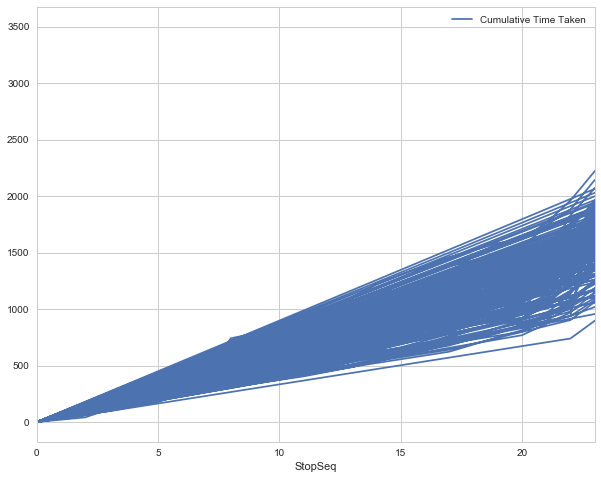

In [167]:
#Mon, 12th, Nov, 2011, route 1, 
#this graph was cleaned by applying averages to stops that were not recorded at the start 
#of a trip i.e. where the first stop recorded was stop 4, averages were applied to the CTT column of stops 0-3, 
#this did not impact averages overall

#dfMonNVJ.plot(kind='line', x='StopSeq', y='Cumulative Time Taken', figsize=(10, 8))
dfMonN.plot(kind='line', x='StopSeq', y='Cumulative Time Taken', figsize=(10, 8))

# RFR

In [168]:
#https://www.kaggle.com/olgabelitskaya/regressors
def scores(regressor, y_train, y_test, y_train_reg, y_test_reg):
    """return various error metrics of models' predictions for model evaluation"""
    regressor_list.append(str(regressor))
    
    ev_train_c = explained_variance_score(y_train, y_train_reg)
    ev_train.append(ev_train_c)
    ev_test_c = explained_variance_score(y_test, y_test_reg)
    ev_test.append(ev_test_c)
    
    r2_train_c = r2_score(y_train, y_train_reg)
    r2_train.append(r2_train_c)
    r2_test_c = r2_score(y_test, y_test_reg)
    r2_test.append(r2_test_c)
    
    mse_train_c = mean_squared_error(y_train, y_train_reg)
    mse_train.append(mse_train_c)
    mse_test_c = mean_squared_error(y_test, y_test_reg)
    mse_test.append(mse_test_c)

    mae_train_c = mean_absolute_error(y_train, y_train_reg)
    mae_train.append(mae_train_c)
    mae_test_c = mean_absolute_error(y_test, y_test_reg)
    mae_test.append(mae_test_c)  
    
    mdae_train_c = median_absolute_error(y_train, y_train_reg)
    mdae_train.append(mdae_train_c)
    mdae_test_c = median_absolute_error(y_test, y_test_reg)
    mdae_test.append(mdae_test_c)
    
    print("______________________________________________________________________________")
    print(str(regressor))
    print("______________________________________________________________________________")
    print("EV score. Train: ", ev_train_c)
    print("EV score. Test: ", ev_test_c)
    print("---------")
    print("R2 score. Train: ", r2_train_c)
    print("R2 score. Test: ", r2_test_c)
    print("---------")
    print("MSE score. Train: ", mse_train_c)
    print("MSE score. Test: ", mse_test_c)
    print("---------")
    print("MAE score. Train: ", mae_train_c)
    print("MAE score. Test: ", mae_test_c)
    print("---------")
    print("MdAE score. Train: ", mdae_train_c)
    print("MdAE score. Test: ", mdae_test_c)

In [169]:
print(os.getcwd())
X=df 
X.head(3)

C:\Users\Cara\Documents\COMPSCI\1A_PRACTICUM


,Year,Month,Day,Hours,Minute,Second,WeekDay,Timestamp,JourneyPatternID,VehicleJourneyID,StopID,Temperature (C),Visibility (km),Wind Speed (km/h),Cumulative Time Taken,StopSeq
0,2012,11,6,8,59,2,1,1352192342,10001,5461,226,7,10,29.6,0,0
1,2012,11,6,9,4,41,1,1352192681,10001,5461,231,8,10,31.5,339,5
2,2012,11,6,9,6,22,1,1352192782,10001,5461,1641,8,10,31.5,440,6


In [170]:
X.dtypes

Year                      int64
Month                     int64
Day                       int64
Hours                     int64
Minute                    int64
Second                    int64
WeekDay                   int64
Timestamp                 int64
JourneyPatternID          int64
VehicleJourneyID          int64
StopID                    int64
Temperature (C)           int64
Visibility (km)          object
Wind Speed (km/h)        object
Cumulative Time Taken     int64
StopSeq                   int32
dtype: object

In [171]:
#y = X.pop("Cumulative Time Taken")

In [172]:
X.describe(include='all').T 

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Year,29527,NaN,NaN,NaN,2012.54,0.497983,2012,2012,2013,2013,2013
Month,29527,NaN,NaN,NaN,5.55041,4.97983,1,1,1,11,11
Day,29527,NaN,NaN,NaN,16.2612,8.00646,1,9,16,23,31
Hours,29527,NaN,NaN,NaN,14.7491,3.79143,7,12,14,17,23
Minute,29527,NaN,NaN,NaN,28.601,17.427,0,14,29,43,59
Second,29527,NaN,NaN,NaN,27.3912,16.8702,0,10,27,44,59
WeekDay,29527,NaN,NaN,NaN,2.65496,1.85128,0,1,3,4,6
Timestamp,29527,NaN,NaN,NaN,1.35597e+09,2.62801e+06,1.35219e+09,1.35332e+09,1.35723e+09,1.35837e+09,1.35963e+09
JourneyPatternID,29527,NaN,NaN,NaN,10001,0,10001,10001,10001,10001,10001
VehicleJourneyID,29527,NaN,NaN,NaN,6625.3,3536.16,4608,4667,4811,5500,16392


In [173]:
X.isnull().sum() #no null values in set

Year                     0
Month                    0
Day                      0
Hours                    0
Minute                   0
Second                   0
WeekDay                  0
Timestamp                0
JourneyPatternID         0
VehicleJourneyID         0
StopID                   0
Temperature (C)          0
Visibility (km)          0
Wind Speed (km/h)        0
Cumulative Time Taken    0
StopSeq                  0
dtype: int64

In [174]:
X['WeekDay'] = X['WeekDay'].astype('category')

In [175]:
X['StopID'] = X['StopID'].astype('category')

In [176]:
X['VehicleJourneyID'] = X['VehicleJourneyID'].astype('category')

In [177]:
numeric_variables = ['Year', 'Month', 'Day', 'Hours', 'Temperature (C)', 'StopSeq', 'Cumulative Time Taken']
X[numeric_variables].head(3)

,Year,Month,Day,Hours,Temperature (C),StopSeq,Cumulative Time Taken
0,2012,11,6,8,7,0,0
1,2012,11,6,9,8,5,339
2,2012,11,6,9,8,6,440


In [178]:
numeric_variables

['Year',
 'Month',
 'Day',
 'Hours',
 'Temperature (C)',
 'StopSeq',
 'Cumulative Time Taken']

In [179]:
categorical_variables = list(X.dtypes[(X.dtypes == "category")].index.values)
X[categorical_variables].head()

,WeekDay,VehicleJourneyID,StopID
0,1,5461,226
1,1,5461,231
2,1,5461,1641
3,1,5461,1642
4,1,5461,47


In [180]:
features = categorical_variables + numeric_variables 
y=X['Cumulative Time Taken']
X[features].head(5)

,WeekDay,VehicleJourneyID,StopID,Year,Month,Day,Hours,Temperature (C),StopSeq,Cumulative Time Taken
0,1,5461,226,2012,11,6,8,7,0,0
1,1,5461,231,2012,11,6,9,8,5,339
2,1,5461,1641,2012,11,6,9,8,6,440
3,1,5461,1642,2012,11,6,9,8,7,536
4,1,5461,47,2012,11,6,9,8,15,1000


In [181]:
#70/30 split of entire cleaned dataset for training/testing
X_train, X_test, y_train, y_test = train_test_split(X[features], y, test_size=0.3)

In [182]:
#factorialise categorical features
for element in categorical_variables:
    train_categories = pd.factorize(X_train[element])
    test_categories = pd.factorize(X_test[element])
    X_train[element] = train_categories[0]
    X_test[element] = test_categories[0]

In [183]:
print(numeric_variables, "\n \n", categorical_variables, "\n \n", features)

['Year', 'Month', 'Day', 'Hours', 'Temperature (C)', 'StopSeq', 'Cumulative Time Taken'] 
 
 ['WeekDay', 'VehicleJourneyID', 'StopID'] 
 
 ['WeekDay', 'VehicleJourneyID', 'StopID', 'Year', 'Month', 'Day', 'Hours', 'Temperature (C)', 'StopSeq', 'Cumulative Time Taken']


In [184]:
print("Training: X, y", len(X_train), len(y_train))
print("Test: X, y", len(X_test), len(y_test))

Training: X, y 20668 20668
Test: X, y 8859 8859


In [185]:
X_train.dtypes

WeekDay                  int64
VehicleJourneyID         int64
StopID                   int64
Year                     int64
Month                    int64
Day                      int64
Hours                    int64
Temperature (C)          int64
StopSeq                  int32
Cumulative Time Taken    int64
dtype: object

In [186]:
# Display correlation, weak correlation separately, ensembling required
pearson = X_train.corr(method='pearson')
pearson

,WeekDay,VehicleJourneyID,StopID,Year,Month,Day,Hours,Temperature (C),StopSeq,Cumulative Time Taken
WeekDay,1.000000,0.206006,-0.013367,0.013802,-0.013802,-0.008900,0.075772,-0.143727,0.006420,-0.002262
VehicleJourneyID,0.206006,1.000000,-0.022089,-0.358642,0.358642,0.147839,0.146277,-0.020851,-0.002171,-0.036961
StopID,-0.013367,-0.022089,1.000000,-0.002921,0.002921,-0.002817,-0.061809,0.006005,-0.030537,-0.052556
Year,0.013802,-0.358642,-0.002921,1.000000,-1.000000,-0.116925,0.046252,-0.262940,0.014891,0.014470
Month,-0.013802,0.358642,0.002921,-1.000000,1.000000,0.116925,-0.046252,0.262940,-0.014891,-0.014470
Day,-0.008900,0.147839,-0.002817,-0.116925,0.116925,1.000000,-0.025472,-0.377993,-0.014271,0.013352
Hours,0.075772,0.146277,-0.061809,0.046252,-0.046252,-0.025472,1.000000,-0.043760,0.112702,0.009881
Temperature (C),-0.143727,-0.020851,0.006005,-0.262940,0.262940,-0.377993,-0.043760,1.000000,0.009865,0.005481
StopSeq,0.006420,-0.002171,-0.030537,0.014891,-0.014891,-0.014271,0.112702,0.009865,1.000000,0.943972
Cumulative Time Taken,-0.002262,-0.036961,-0.052556,0.014470,-0.014470,0.013352,0.009881,0.005481,0.943972,1.000000


In [187]:
#make list of feature based on importance to target feature
corr_with_CTT = pearson.iloc[-1][:-1]
corr_with_CTT[abs(corr_with_CTT).argsort()[::-1]][:10]

StopSeq             0.943972
StopID             -0.052556
VehicleJourneyID   -0.036961
Year                0.014470
Month              -0.014470
Day                 0.013352
Hours               0.009881
Temperature (C)     0.005481
WeekDay            -0.002262
Name: Cumulative Time Taken, dtype: float64

In [188]:
features_list = corr_with_CTT[abs(corr_with_CTT).argsort()[::-1]][:16].index.values.tolist()
print(features_list)

['StopSeq', 'StopID', 'VehicleJourneyID', 'Year', 'Month', 'Day', 'Hours', 'Temperature (C)', 'WeekDay']


# generate input dict + predict trip time for rfr

In [189]:
columns = list(X_train[features_list])

In [190]:
data = {'StopSeq' : 4, 'VehicleJourneyID' : 5461, 'StopID' : 231, 'Day' : 9 , 
        'WeekDay' : 4, 'Year' : 2012, 'Month' : 11, 'Temperature (C)' : 12, 'Hours' : 17}


In [191]:
# df_input = pd.DataFrame.from_dict(data, orient='index') #columns = columns)
# df_input.columns = [columns]
# print(df_input.head(3))

In [192]:
# dfWow = pd.Series(columns)
# #df['new_cols'] = dfWow.data
# dfWow

In [193]:
# se = pd.Series(mylist)
# df['new_col'] = se.values

In [194]:
target_train = X_train['Cumulative Time Taken'].as_matrix()
features_train = X_train[features_list].as_matrix()
features_test = X_test[features_list].as_matrix()

In [195]:
print(target_train)

[   0  919 2325 ..., 2516 2032  882]


In [196]:
print(list(X_train[features_list]))

['StopSeq', 'StopID', 'VehicleJourneyID', 'Year', 'Month', 'Day', 'Hours', 'Temperature (C)', 'WeekDay']


In [197]:
print(type(features_train))

<class 'numpy.ndarray'>


In [198]:
print(features_train)

[[  0   0   0 ...,  17   6   0]
 [ 14   1   1 ...,  14  12   1]
 [ 28   2   2 ...,  17  12   2]
 ..., 
 [ 28   2   8 ...,  11  13   5]
 [ 41  20 241 ...,  20  10   6]
 [ 14   1 145 ...,  15   4   1]]


In [199]:
# Scale the data
scale = RobustScaler()

features_train = scale.fit_transform(features_train)
features_test = scale.transform(features_test)

In [200]:
print(features_train)

[[-1.29411765 -0.71428571 -0.74193548 ...,  0.6        -0.16666667 -0.75      ]
 [-0.47058824 -0.66666667 -0.73387097 ...,  0.          0.83333333 -0.5       ]
 [ 0.35294118 -0.61904762 -0.72580645 ...,  0.6         0.83333333 -0.25      ]
 ..., 
 [ 0.35294118 -0.61904762 -0.67741935 ..., -0.6         1.          0.5       ]
 [ 1.11764706  0.23809524  1.2016129  ...,  1.2         0.5         0.75      ]
 [-0.47058824 -0.66666667  0.42741935 ...,  0.2        -0.5        -0.5       ]]


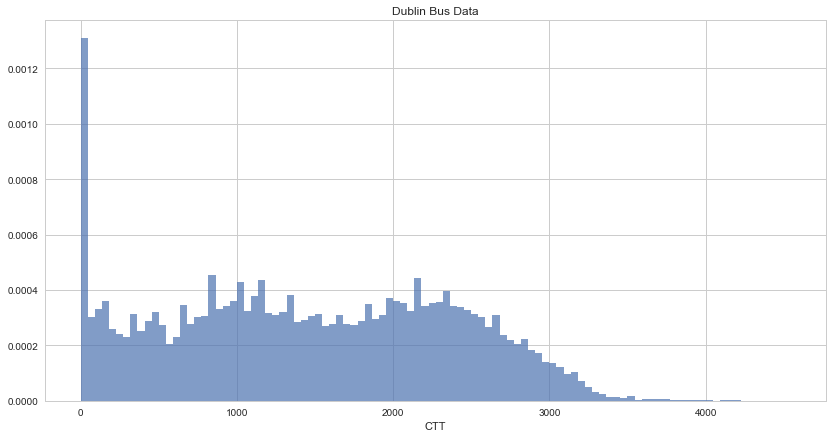

In [201]:
#binned hist of all CTT values
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(14, 7))

plt.hist(target_train, bins=100, normed=True, alpha=0.7)

plt.xlabel("CTT")
plt.title('Dublin Bus Data');

In [202]:
X_train, X_test, y_train, y_test = train_test_split(features_train, target_train,  #X, y
                                                    test_size = 0.2, random_state = 1)
X_train.shape, X_test.shape

((16534, 9), (4134, 9))

In [203]:
regressor_list = []
ev_train = []
ev_test = []
r2_train = []
r2_test = []
mse_train = []
mse_test = []
mae_train = []
mae_test = []
mdae_train = []
mdae_test = []

In [204]:
#https://www.kaggle.com/olgabelitskaya/regressors
def regression(regressor, x_train, x_test, y_train):
    reg = regressor
    reg.fit(x_train, y_train)
    
    y_train_reg = reg.predict(x_train) #predictions for train, test sets
    y_test_reg = reg.predict(x_test)
    
    return y_train_reg, y_test_reg

In [205]:
# RandomForestRegressor, AdaBoost, GradientBoostRegressor, BaggingRegressor
y_train_rfr, y_test_rfr = regression(RandomForestRegressor(), 
                                     X_train, X_test, y_train)

y_train_abr, y_test_abr = regression(AdaBoostRegressor(), 
                                     X_train, X_test, y_train)

y_train_gbr, y_test_gbr = regression(gBR(), 
                                     X_train, X_test, y_train)

y_train_br, y_test_br = regression(BaggingRegressor(), 
                                   X_train, X_test, y_train)

In [206]:
scores(RandomForestRegressor(), y_train, y_test, y_train_rfr, y_test_rfr)
scores(AdaBoostRegressor(), y_train, y_test, y_train_abr, y_test_abr)
scores(gBR(), y_train, y_test, y_train_gbr, y_test_gbr)
scores(BaggingRegressor(), y_train, y_test, y_train_br, y_test_br)

______________________________________________________________________________
AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None)
______________________________________________________________________________
EV score. Train:  0.915851809165
EV score. Test:  0.916314615982
---------
R2 score. Train:  0.91035039522
R2 score. Test:  0.910219832994
---------
MSE score. Train:  74581.912141
MSE score. Test:  73710.5022762
---------
MAE score. Train:  205.731058903
MAE score. Test:  205.226292636
---------
MdAE score. Train:  151.146078673
MdAE score. Test:  151.488303915
______________________________________________________________________________
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1,

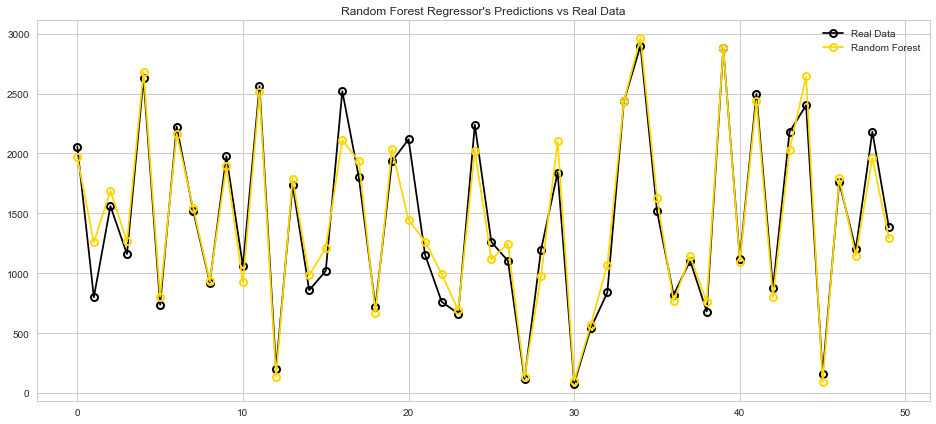

In [208]:
plt.figure(figsize = (16, 7))

plt.plot(y_test[0:50], '-o', color = 'black', label='Real Data',
         markersize=7, markerfacecolor="None", markeredgewidth=2)

plt.plot(y_test_rfr[0:50], '-o', color = 'gold', label='Random Forest',
        markersize=7, markerfacecolor="None", markeredgewidth=2)

plt.legend()
plt.title("Random Forest Regressor's Predictions vs Real Data");

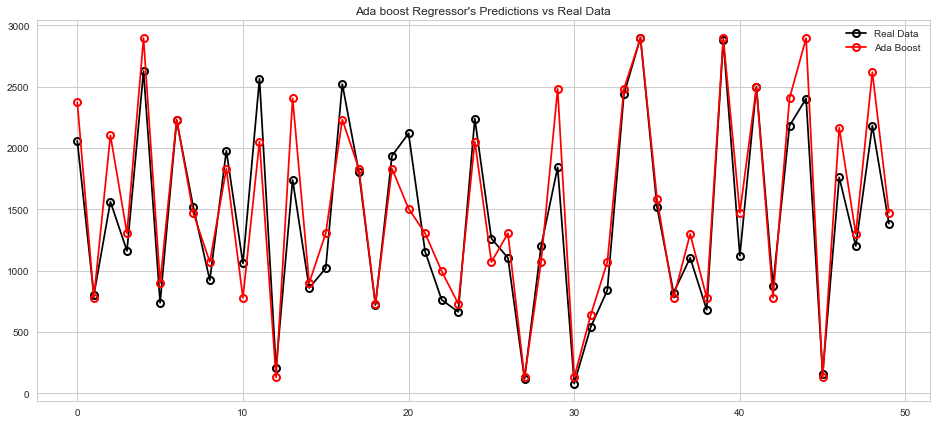

In [207]:
plt.figure(figsize = (16, 7))

plt.plot(y_test[0:50], '-o', color = 'black', label='Real Data',
         markersize=7, markerfacecolor="None", markeredgewidth=2)

plt.plot(y_test_abr[0:50], '-o', color = 'red', label='Ada Boost',
        markersize=7, markerfacecolor="None", markeredgewidth=2)

plt.legend()
plt.title("Ada boost Regressor's Predictions vs Real Data");

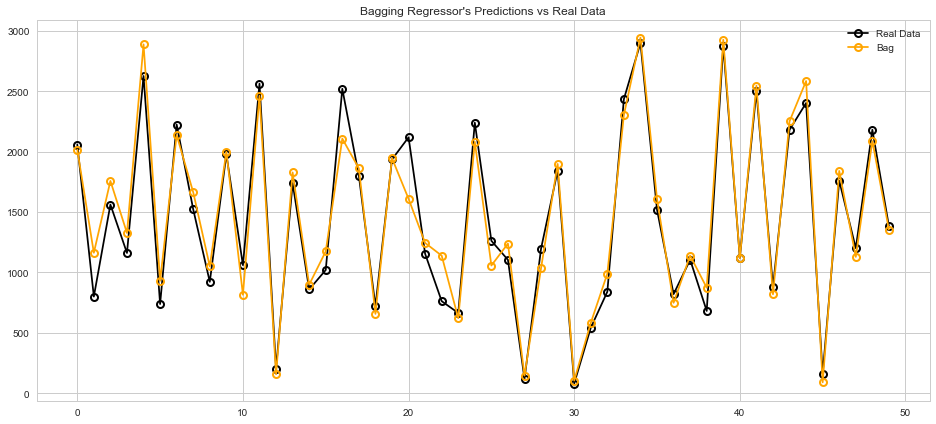

In [209]:
plt.figure(figsize = (16, 7))

plt.plot(y_test[0:50], '-o', color = 'black', label='Real Data',
         markersize=7, markerfacecolor="None", markeredgewidth=2)

plt.plot(y_test_br[0:50], '-o', color = 'orange', label='Bag',
        markersize=7, markerfacecolor="None", markeredgewidth=2)

plt.legend()
plt.title("Bagging Regressor's Predictions vs Real Data");

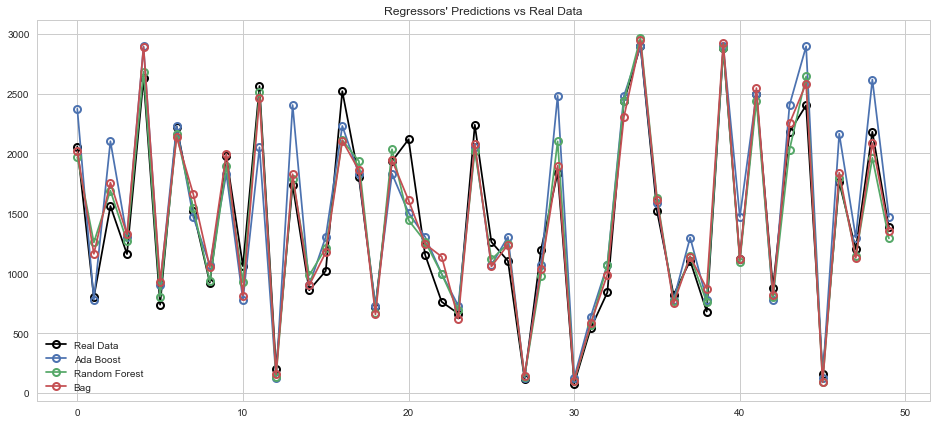

In [210]:
plt.figure(figsize = (16, 7))

plt.plot(y_test[0:50], '-o', color = 'black', label='Real Data',
         markersize=7, markerfacecolor="None", markeredgewidth=2)

plt.plot(y_test_rfr[0:50], '-o', label='Random Forest',
        markersize=7, markerfacecolor="None", markeredgewidth=2)

plt.plot(y_test_abr[0:50], '-o', label='Ada Boost',
        markersize=7, markerfacecolor="None", markeredgewidth=2)

plt.plot(y_test_br[0:50], '-o', label='Bag',
        markersize=7, markerfacecolor="None", markeredgewidth=2)

plt.legend()
plt.title("Regressors' Predictions vs Real Data");

In [211]:
#based on scoring, RFR performed best when predicting test set
model = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=42)

model.fit(X[features], y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=True, random_state=42,
           verbose=0, warm_start=False)

In [212]:
reg = RandomForestRegressor(max_depth=4, n_estimators=182, 
                                min_samples_leaf=50, min_samples_split=2)
reg.fit(features_train, target_train)

target_train_predict = reg.predict(features_train)
target_test_predict = reg.predict(features_test)

In [213]:
print(target_train_predict)
#print(target_train_predict[11])

[    8.49978498   960.80124861  2109.06857589 ...,  2109.06857589
  2330.84418136   960.80124861]


In [214]:
print(target_test_predict[10])
print(target_test_predict[11])

761.272769807
1046.75006338


In [217]:
target_predict = ["{0:.2f}".format(x) for x in target_test_predict]


submission = pd.DataFrame({"CTT": target_predict, "StopID": X_test['StopID'] }) #check x_test
print(submission[0:40])

# submission.to_csv('kaggle_housing.csv', index=False)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
#check out xgboost, ensembling, other regression models in scikit

In [ ]:
#xgboost link

In [ ]:
#gradientboostregressor

In [ ]:
# train model on train set, test model on test data

In [ ]:
#run model for single day, week, single route

In [ ]:
#create ordered feature importance list

In [ ]:
#create input to pass in for prediction